In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from math import sqrt

# Explore the Data

In [30]:
file_path = 'v2_Latest_Data_Science_Salaries.csv'
df = pd.read_csv(file_path)

df

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Machine Learning Manager,Full-Time,Senior,Expert,120000,Euro,United States,129562,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Junior,50000,United States Dollar,Kenya,50000,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,Expert,227850,United States Dollar,United States,227850,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,Expert,180500,United States Dollar,United States,180500,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,Intermediate,90000,United States Dollar,United States,90000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...
3465,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020
3466,Principal Data Scientist,Full-Time,Mid,Intermediate,151000,United States Dollar,United States,151000,United States,Large,2021
3467,Data Scientist,Full-Time,Entry,Junior,105000,United States Dollar,United States,105000,United States,Small,2020
3468,Business Data Analyst,Contract,Entry,Junior,100000,United States Dollar,United States,100000,United States,Large,2020


In [31]:
df.describe()

,Salary,Salary in USD,Year
count,3.470000e+03,3470.000000,3470.000000
mean,2.027137e+05,142385.374640,2022.519885
std,7.117035e+05,68730.522053,0.707031
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,91029.500000,2022.000000
50%,1.400000e+05,136000.000000,2023.000000
75%,1.900000e+05,185000.000000,2023.000000
max,3.040000e+07,450000.000000,2023.000000


In [32]:
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Machine Learning Manager,Full-Time,Senior,Expert,120000,Euro,United States,129562,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Junior,50000,United States Dollar,Kenya,50000,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,Expert,227850,United States Dollar,United States,227850,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,Expert,180500,United States Dollar,United States,180500,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,Intermediate,90000,United States Dollar,United States,90000,United States,Medium,2023


## Box Plots of Salary Features

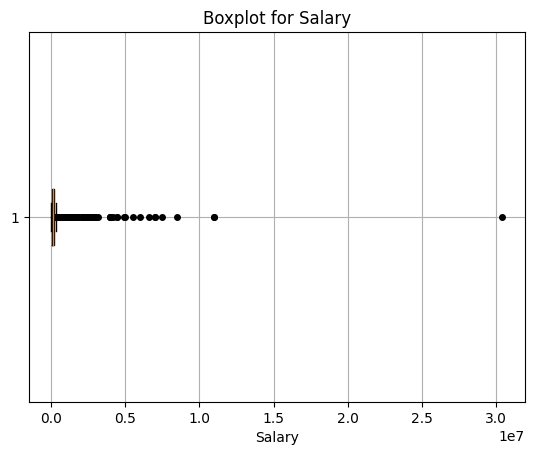

In [33]:
## Box plot for Salary

## salary will be extremeley skewed due to differences in currency value. Conclude that we will use Salary in USD
## as the feature we will predict
salaries = df["Salary"]
box_plot = pyplot.boxplot(salaries, vert=False)

# change open dots to closed dots
for outlier in box_plot['fliers']:
    outlier.set(marker='o', markersize=4, markerfacecolor='black', markeredgecolor='black')
    
pyplot.xlabel('Salary')
pyplot.title("Boxplot for Salary")
pyplot.grid(True)
pyplot.show()

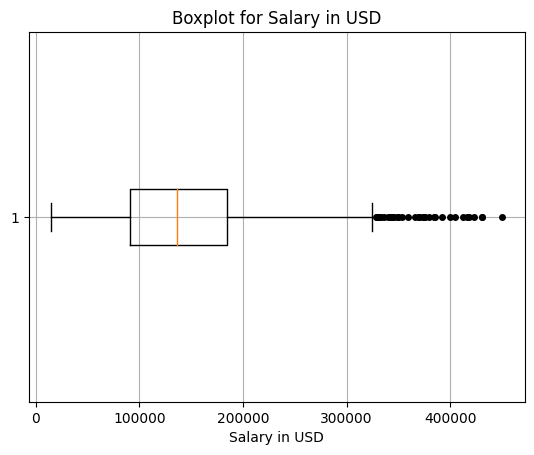

In [34]:
## Box plot for Salary in USD

## the vast majority of individuals make betweeen X and Y, therefor when testing we should see predictions fall
## within this range most of the time.

## sift through outliers
salaries = df["Salary in USD"]
box_plot = pyplot.boxplot(salaries, vert=False)

# change open dots to closed dots
for outlier in box_plot['fliers']:
    outlier.set(marker='o', markersize=4, markerfacecolor='black', markeredgecolor='black')
    
pyplot.xlabel('Salary in USD')
pyplot.title("Boxplot for Salary in USD")
pyplot.grid(True)
pyplot.show()

The plot for 'Salary' is heavily skewed due to the differences between all the different currencies used in the dataset. The 'Salary in USD' feature is more evenly distributed, so we elect to focus on 'Salary in USD' to create predictions on.

In [35]:
# remove "salary in USD" and 'salary currency' from dataset

df.drop('Salary', axis=1, inplace=True)
df.drop('Salary Currency', axis=1, inplace=True)
df.rename(columns={'Salary in USD':'Salary'}, inplace=True)
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Company Location,Salary,Employee Residence,Company Size,Year
0,Machine Learning Manager,Full-Time,Senior,Expert,United States,129562,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Junior,Kenya,50000,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,Expert,United States,227850,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,Expert,United States,180500,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,Intermediate,United States,90000,United States,Medium,2023


## Barchart for Job Title Counts

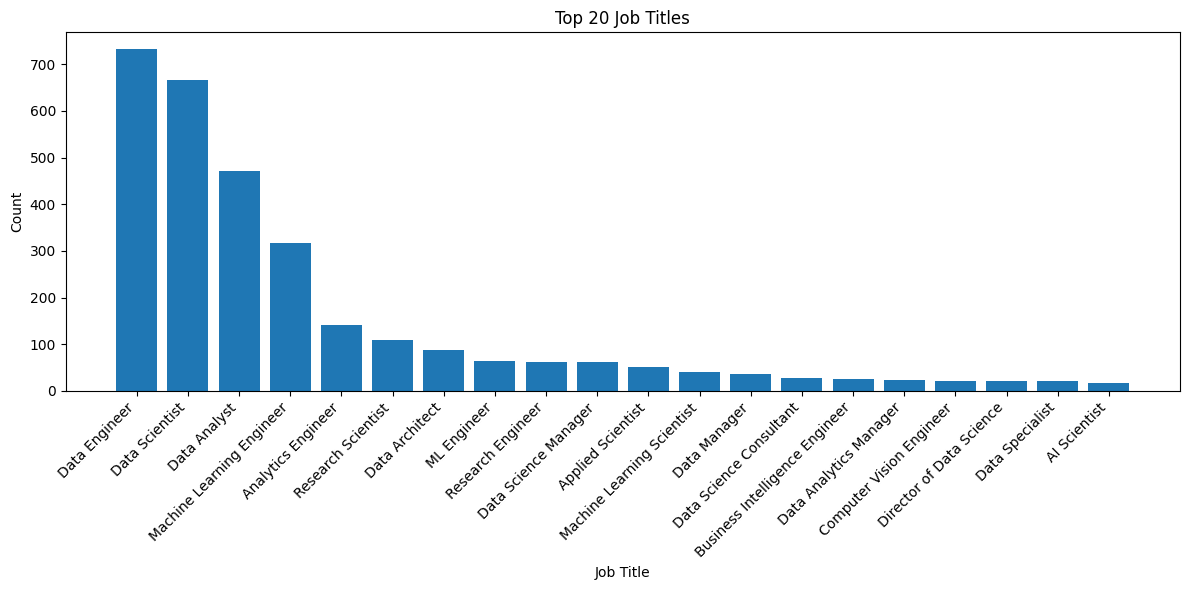

In [36]:
job_title_counts = df['Job Title'].value_counts()

# Select only the top 20 job titles
top_20_job_titles = job_title_counts.head(20)

# Plot the bar chart
pyplot.figure(figsize=(12, 6))
pyplot.bar(top_20_job_titles.index, top_20_job_titles.values)
pyplot.xlabel('Job Title')
pyplot.ylabel('Count')
pyplot.title('Top 20 Job Titles')
pyplot.xticks(rotation=45, ha='right')
pyplot.tight_layout()
pyplot.show()

From the above plot, it can be seen that Machine Learning Engineer and ML Engineer are referring to the same job. We elect to combine these into 'Machine Learning Engineer'.

In [37]:
# replace ML Engineer with Machine Learning Engineer
df['Job Title'] = df["Job Title"].replace('ML Engineer', "Machine Learning Engineer")

## Barchart for Employee Locations

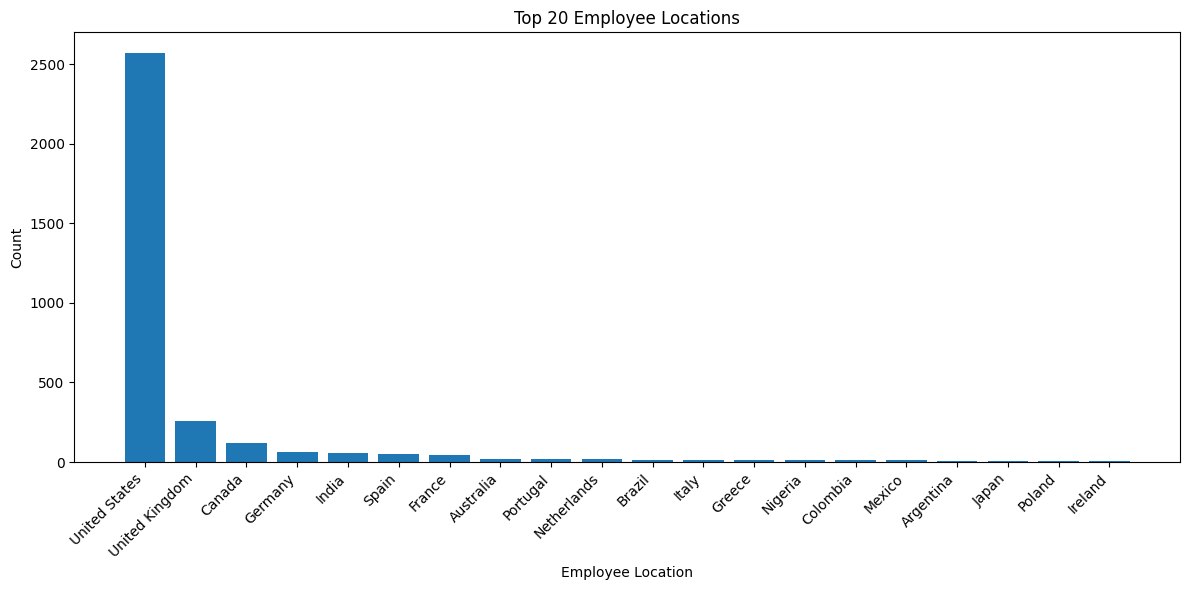

In [38]:
job_title_counts = df['Employee Residence'].value_counts()

# Select only the top 20 job titles
top_20_job_titles = job_title_counts.head(20)

# Plot the bar chart
pyplot.figure(figsize=(12, 6))
pyplot.bar(top_20_job_titles.index, top_20_job_titles.values)
pyplot.xlabel('Employee Location')
pyplot.ylabel('Count')
pyplot.title('Top 20 Employee Locations')
pyplot.xticks(rotation=45, ha='right')
pyplot.tight_layout()
pyplot.show()

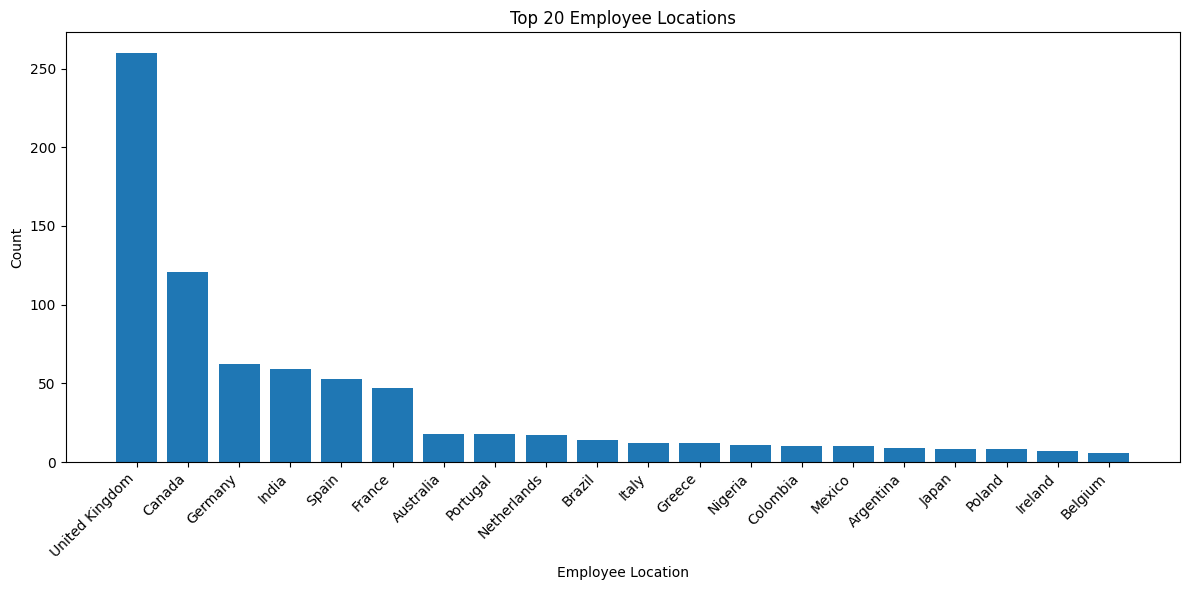

In [39]:
# Plot the barchart excluding United States

job_title_counts = df['Employee Residence'].value_counts()
job_title_counts = job_title_counts.iloc[1:]

# Select only the top 20 (minus United States) job titles
top_20_job_titles = job_title_counts.head(20)

# Plot the bar chart
pyplot.figure(figsize=(12, 6))
pyplot.bar(top_20_job_titles.index, top_20_job_titles.values)
pyplot.xlabel('Employee Location')
pyplot.ylabel('Count')
pyplot.title('Top 20 Employee Locations')
pyplot.xticks(rotation=45, ha='right')
pyplot.tight_layout()
pyplot.show()

Based on the barchart above, the front-end application will only display the salaries from the top 7 (down to France).

## Explore the other Features

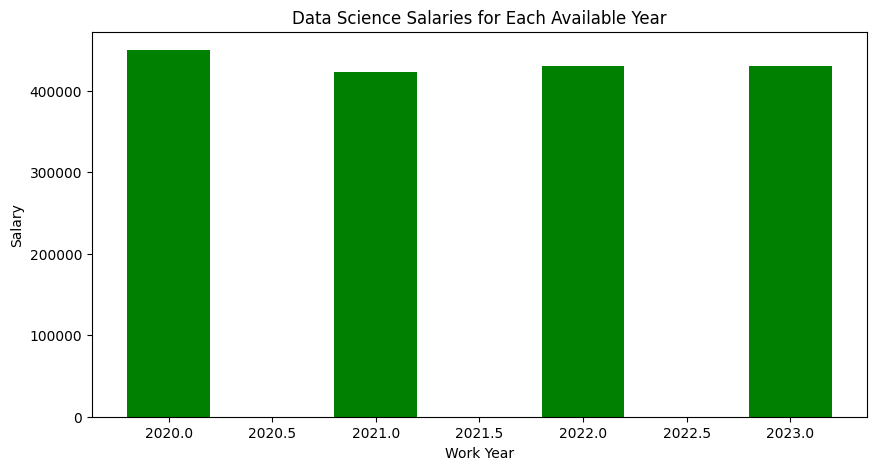

In [40]:
fig = pyplot.figure(figsize = (10, 5))
 
# creating the bar plot
pyplot.bar(df['Year'], df['Salary'], color ='green',
        width = 0.4)
 
pyplot.xlabel("Work Year")
pyplot.ylabel("Salary")
pyplot.title("Data Science Salaries for Each Available Year")
pyplot.show()

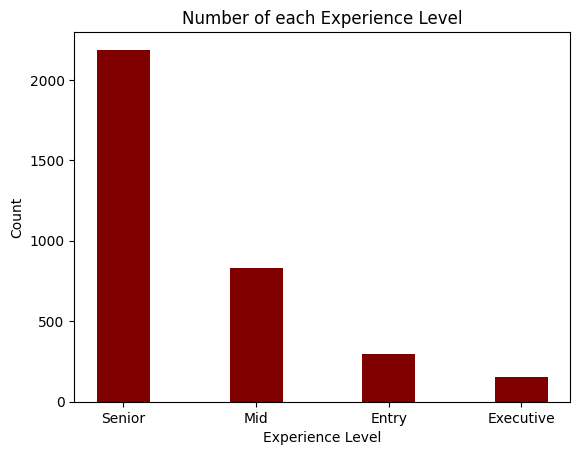

In [41]:
job_title_counts = df['Experience Level'].value_counts()
    
# creating the bar plot
pyplot.bar(job_title_counts.index, job_title_counts.values, color ='maroon',
        width = 0.4)
 
pyplot.xlabel("Experience Level")
pyplot.ylabel("Count")
pyplot.title("Number of each Experience Level")
pyplot.show()

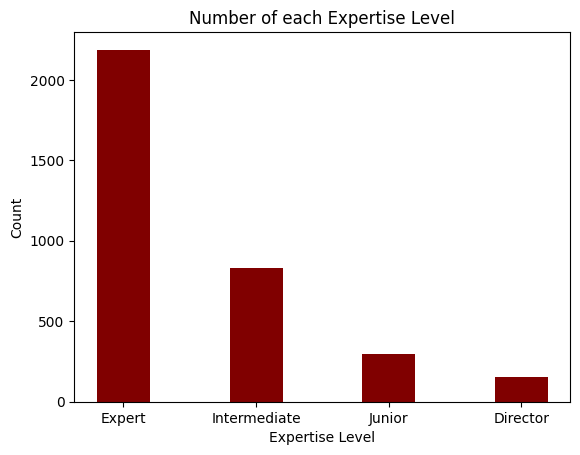

In [42]:
job_title_counts = df['Expertise Level'].value_counts()
    
# creating the bar plot
pyplot.bar(job_title_counts.index, job_title_counts.values, color ='maroon',
        width = 0.4)
 
pyplot.xlabel("Expertise Level")
pyplot.ylabel("Count")
pyplot.title("Number of each Expertise Level")
pyplot.show()

### Reduntant Feature?

From the charts for Expertise and Experience level, we notice that the values of both features match very closely. Let's see how close.

In [43]:
# expect mapping of these attributes to be the same across all instances
expected_mapping = {
    "Senior": "Expert",
    "Mid": "Intermediate",
    "Entry": "Junior",
    "Executive": "Director"
}

# Check if the correspondence is true for all instances
correspondence_check = df.groupby("Experience Level")["Expertise Level"].apply(lambda x: (x == expected_mapping[x.name]).all())

# Check if all combinations are True
if correspondence_check.all():
    print("The correspondence is true for all instances.")
else:
    print("The correspondence is NOT true for all instances.")

The correspondence is true for all instances.


Based on the code in the cell above, we can remove one of these features. We elect to remove Expertise.

In [44]:
df.drop('Expertise Level', axis=1, inplace=True)
df.head()

,Job Title,Employment Type,Experience Level,Company Location,Salary,Employee Residence,Company Size,Year
0,Machine Learning Manager,Full-Time,Senior,United States,129562,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Kenya,50000,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,United States,227850,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,United States,180500,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,United States,90000,United States,Medium,2023


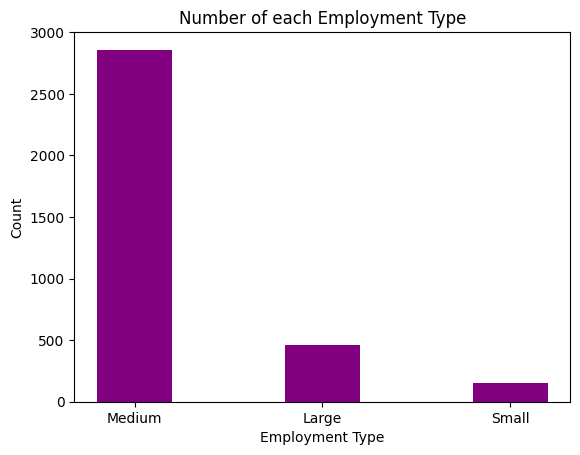

In [45]:
job_title_counts = df['Company Size'].value_counts()
    
# creating the bar plot
pyplot.bar(job_title_counts.index, job_title_counts.values, color ='purple',
        width = 0.4)
 
pyplot.xlabel("Employment Type")
pyplot.ylabel("Count")
pyplot.title("Number of each Employment Type")
pyplot.show()

# Model the Data

## Split the dataset

In [46]:
# Define the categorical columns
categorical_cols = ['Job Title', 'Employment Type', 'Experience Level',
                    'Company Location', 'Employee Residence', 'Company Size']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first')

# Initialize the ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', ohe, categorical_cols)], remainder='passthrough')

# Apply the ColumnTransformer to the dataset
X = df.drop(columns=['Salary'])
y = df['Salary']

X_encoded = ct.fit_transform(X)

# Split the dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_encoded, y, test_size=0.2, random_state=1)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2776, 274), (694, 274), (2776,), (694,))

## Describe the Processed Data

In [47]:
X.head()

,Job Title,Employment Type,Experience Level,Company Location,Employee Residence,Company Size,Year
0,Machine Learning Manager,Full-Time,Senior,United States,Germany,Large,2023
1,BI Data Analyst,Full-Time,Entry,Kenya,Kenya,Small,2023
2,AI Engineer,Full-Time,Senior,United States,United States,Medium,2023
3,AI Engineer,Full-Time,Senior,United States,United States,Medium,2023
4,Data Analyst,Full-Time,Mid,United States,United States,Medium,2023


In [48]:
y.head()

0    129562
1     50000
2    227850
3    180500
4     90000
Name: Salary, dtype: int64

## Train and Test Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt


# initialize model
lr = LinearRegression()

# train model
lr.fit(X_train, y_train)

# get predictions
preds = lr.predict(X_test)

# Determine performance by analyzing root mean squared error, coefficient of determination, and the mean absolute error
rmse = sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(preds, y_test)

r2 = r2_score(y_test, preds)

result_message = "RMSE = {}\tR^2 = {}\tMAE = {}".format(rmse, r2, mae)
print(result_message)

RMSE = 53766.16901459532	R^2 = 0.41551829506962024	MAE = 40993.29986116707


## Save Model

In [50]:
import pickle

# save model 
pickle.dump(lr, open('linear_regression_model.sav', 'wb'))

# save dataframe to new csv

# insert '_' instead of spaces in column names
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.to_csv('processed_dataset.csv', index=False)

## Example Prediction

In [51]:
test_data = pd.DataFrame({
    'Year': [2023],
    'Experience Level': ['Senior'],
    'Employment Type': ['Full-Time'],
    'Job Title': ['AI Engineer'],
    'Employee Residence': ['United States'],
    'Company Location': ['United States'],
    'Company Size': ['Medium'],
})

encoded_data = ct.transform(test_data)

lr.predict(encoded_data)[0]

227834.83633213863